# Step 1 - Importing Libraries and Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

## Step 2 - Visualization

[9]


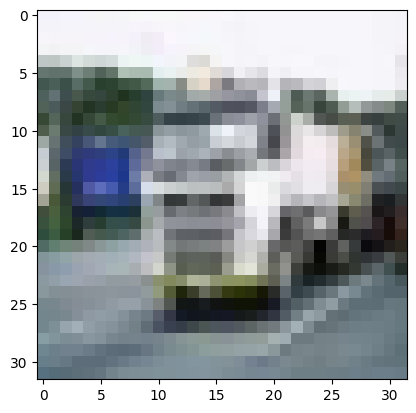

In [ ]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


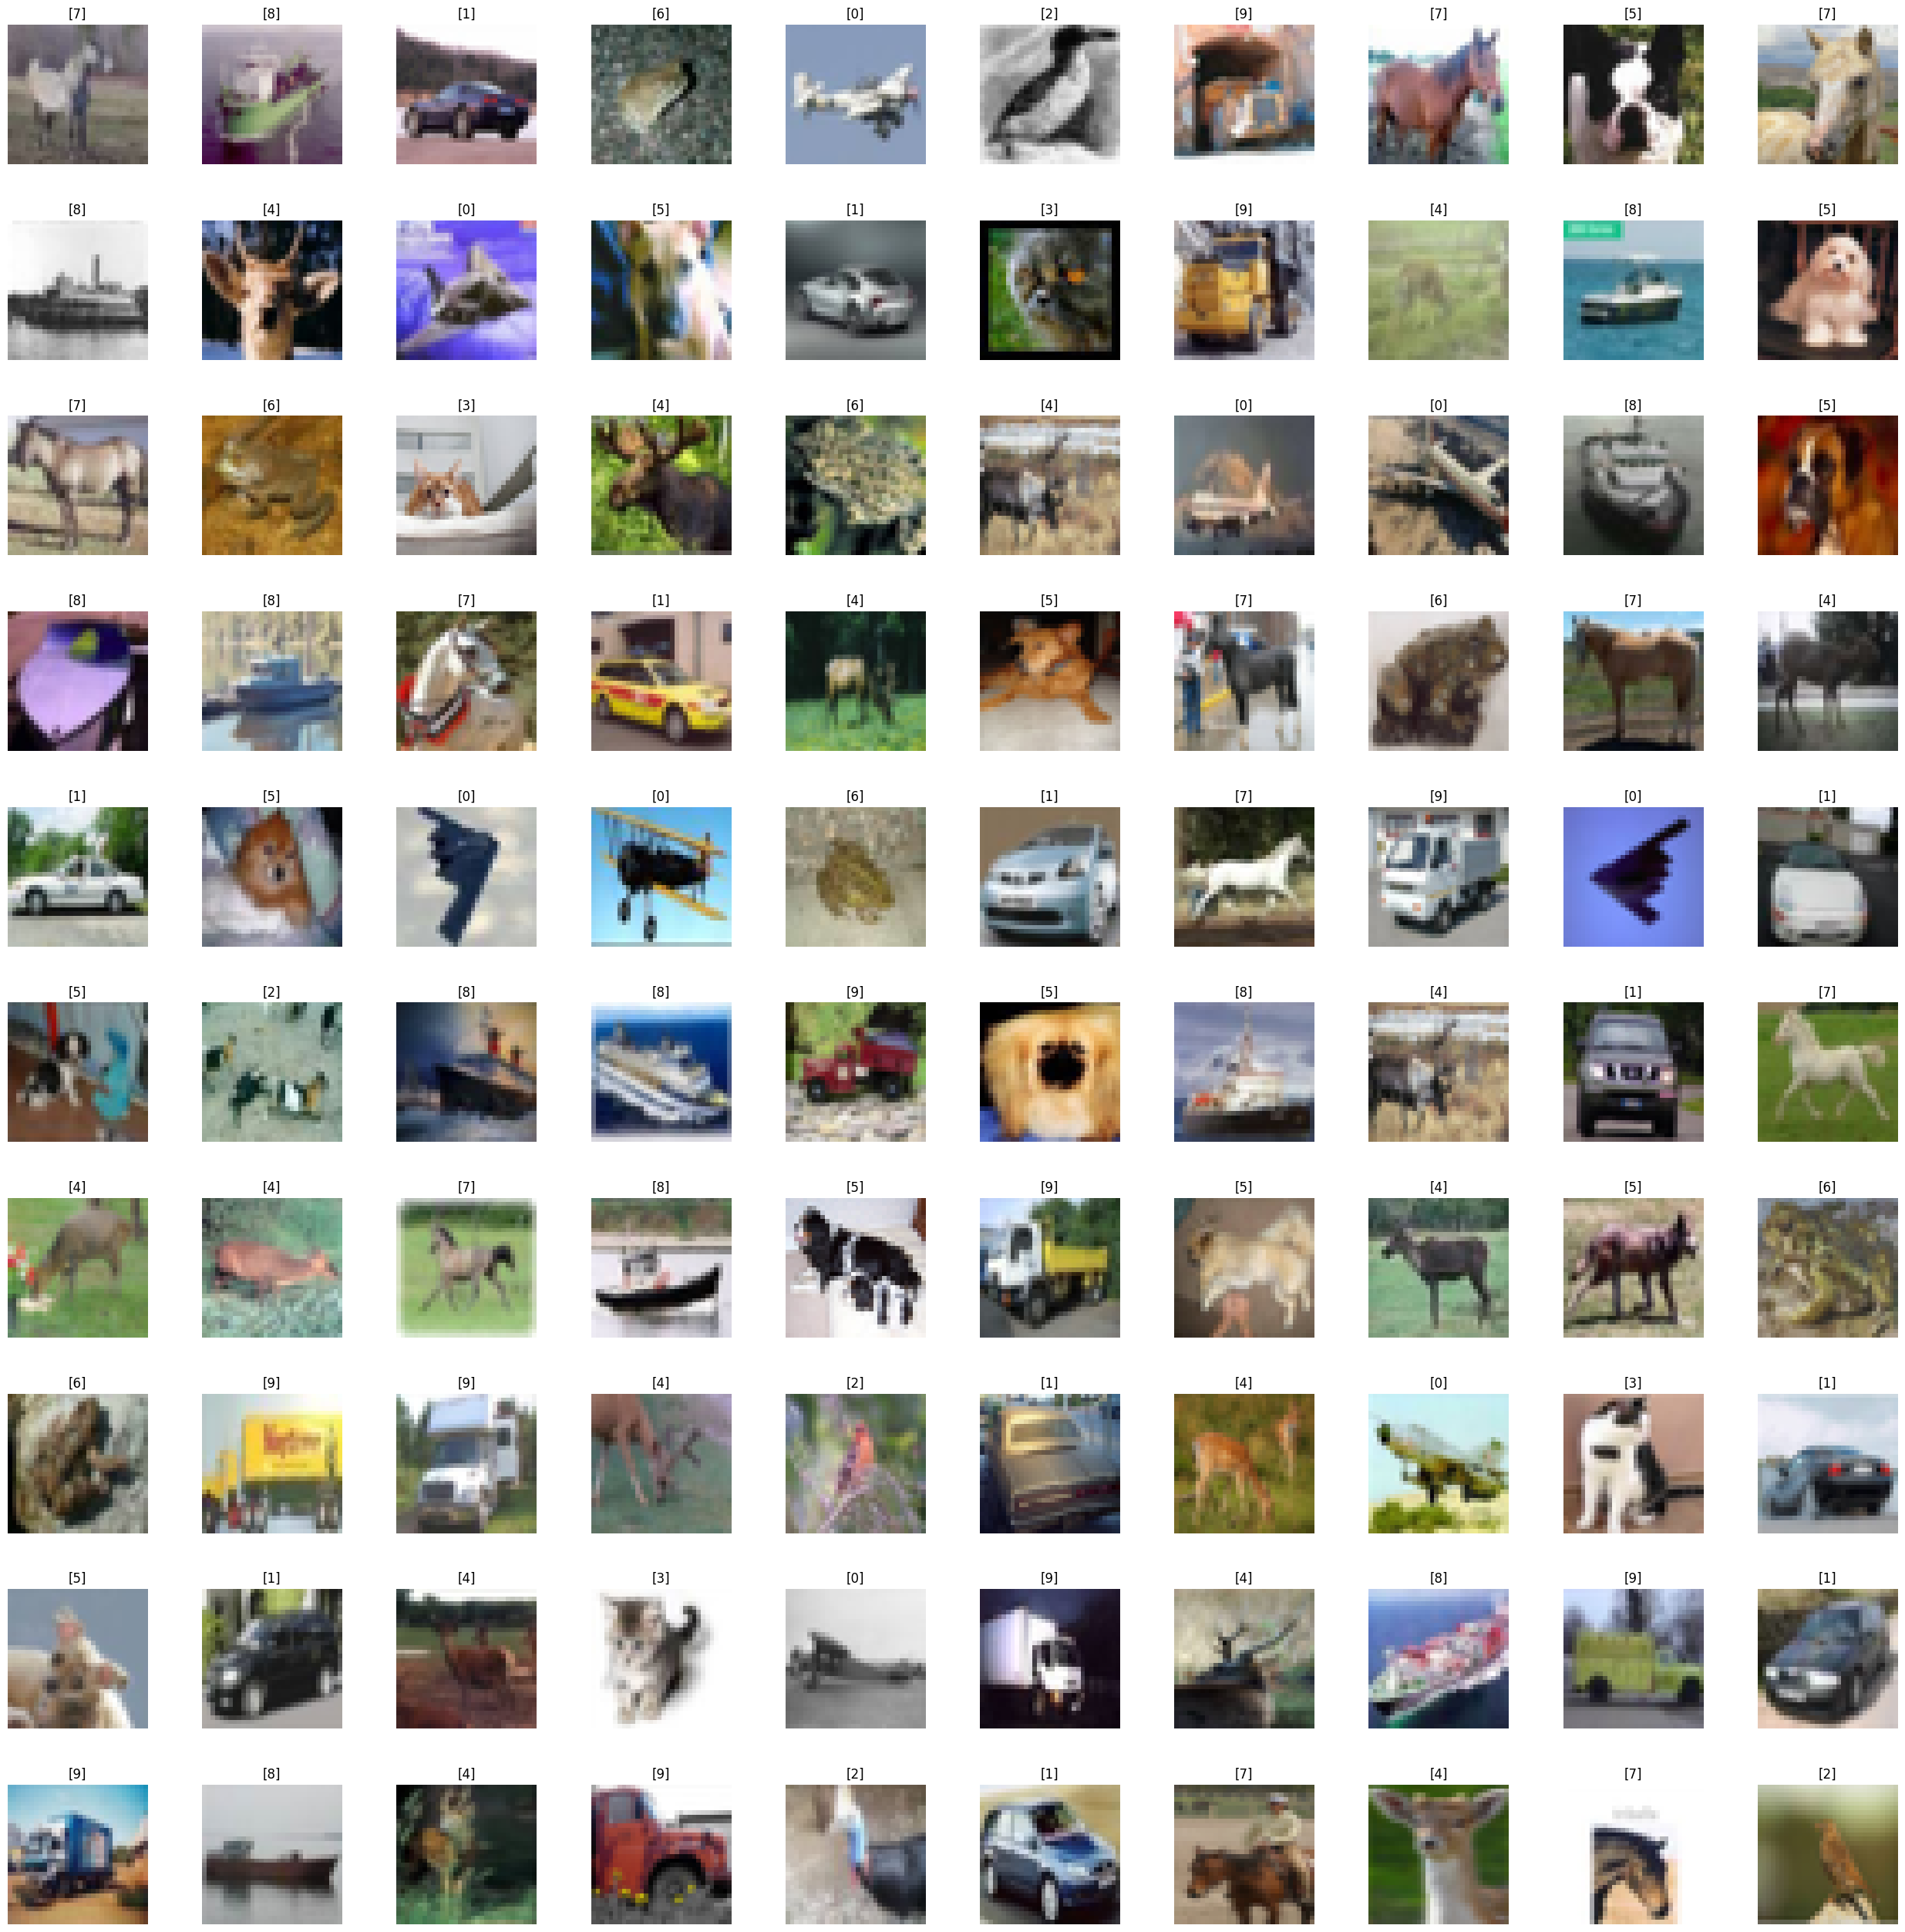

In [ ]:
L_grid = 10
W_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (32, 32))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training) # pick a random number
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

## Step 3 - Data Preparation

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10) # creating categorical values from decimal to binary format for output layer
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#normalization
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

## Step 4 - Training the model

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu', input_shape = input_shape))
cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.AveragePooling2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 2048, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 2048, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = cnn.fit(X_train, y_train, batch_size= 32, epochs=22, shuffle = True)

## STEP 5: EVALUATE THE MODEL

In [ ]:
evaluation = cnn.evaluate(X_test, y_test)

In [ ]:
print("Test Accuarcy Score: {}".format(evaluation[1]))

In [ ]:
y_pred = np.argmax(cnn.predict(X_test), axis = -1)
print(y_pred)

In [ ]:
y_test

In [ ]:
y_test = y_test.argmax(1)

In [ ]:
y_test

In [ ]:
L = 7
W = 7
fig , axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title("Prediction: {}\n True = {}".format(y_pred[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: IMPROVING THE MODEL WITH DATA AUGMENTATION



*  Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images.
* Augmentations also include shifting and changing the brightness of the images.



## STEP 6.1 MODEL TRAINING USING AUGEMENTED DATASET

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

In [ ]:
score = np.argmax(cnn.evaluate(X_test, y_test), axis = -1)
print('Test accuracy', score[1])

In [ ]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model colab.h5')
cnn.save(model_path)

# **#DONE**